In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn import svm, datasets

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('student_dropout.csv')

In [3]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
data.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [7]:
data['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [8]:
inputs = data.drop(columns=['Target'])
target = data['Target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.5, random_state=365)

In [14]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
C = 1.0

In [16]:
svc = svm.SVC(kernel='linear', C=C)

In [17]:
svc.fit(X_train_scaled, y_train_encoded)

SVC(kernel='linear')

In [18]:
y_pred = svc.predict(X_test_scaled)

In [20]:
print(confusion_matrix(y_test_encoded, y_pred))

[[ 536   58  115]
 [  94  107  221]
 [  17   30 1034]]


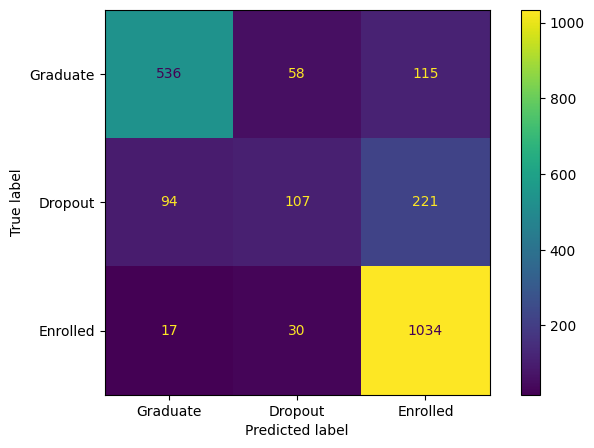

In [21]:
fig, ax = plt.subplots(figsize=(8,5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_encoded, y_pred),
    display_labels = ['Graduate', 'Dropout', 'Enrolled'],
)

cmp.plot(ax=ax)

In [32]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       709
           1       0.55      0.25      0.35       422
           2       0.75      0.96      0.84      1081

    accuracy                           0.76      2212
   macro avg       0.71      0.66      0.66      2212
weighted avg       0.74      0.76      0.73      2212



In [24]:
svc2 = svm.SVC(kernel='rbf', C=1.0, gamma=1e-3)
svc.fit(X_train_scaled, y_train_encoded)
y_pred2 = svc.predict(X_test_scaled)
print(confusion_matrix(y_test_encoded, y_pred2))

[[ 536   58  115]
 [  94  107  221]
 [  17   30 1034]]


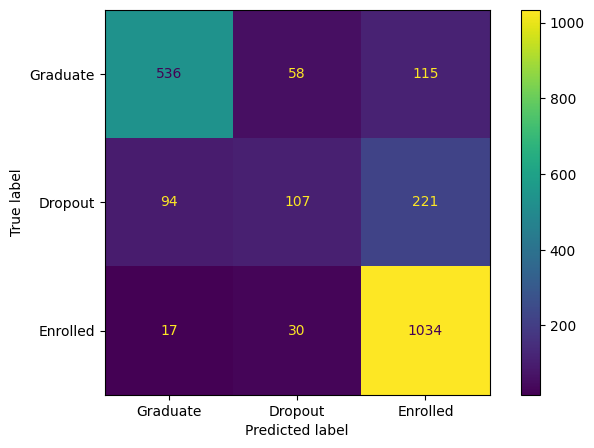

In [25]:
fig, ax = plt.subplots(figsize=(8,5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_encoded, y_pred2),
    display_labels = ['Graduate', 'Dropout', 'Enrolled'],
)

cmp.plot(ax=ax)

In [33]:
print(classification_report(y_test_encoded, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       709
           1       0.55      0.25      0.35       422
           2       0.75      0.96      0.84      1081

    accuracy                           0.76      2212
   macro avg       0.71      0.66      0.66      2212
weighted avg       0.74      0.76      0.73      2212



In [26]:
svc3 = svm.SVC(kernel='sigmoid', C=1.0)
svc.fit(X_train_scaled, y_train_encoded)
y_pred3 = svc.predict(X_test_scaled)
print(confusion_matrix(y_test_encoded, y_pred3))

[[ 536   58  115]
 [  94  107  221]
 [  17   30 1034]]


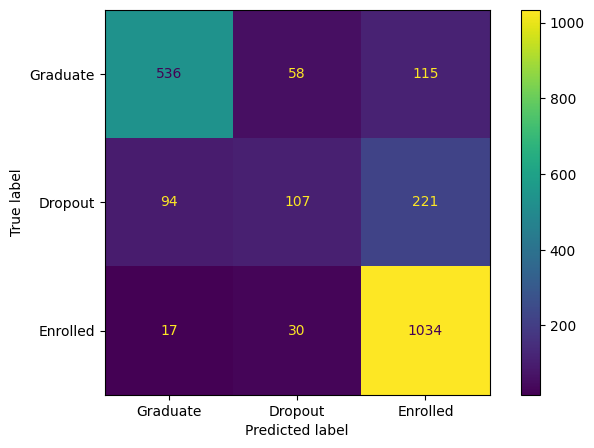

In [27]:
fig, ax = plt.subplots(figsize=(8,5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_encoded, y_pred3),
    display_labels = ['Graduate', 'Dropout', 'Enrolled'],
)

cmp.plot(ax=ax)

In [34]:
print(classification_report(y_test_encoded, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       709
           1       0.55      0.25      0.35       422
           2       0.75      0.96      0.84      1081

    accuracy                           0.76      2212
   macro avg       0.71      0.66      0.66      2212
weighted avg       0.74      0.76      0.73      2212



In [29]:
svc4 = svm.SVC(kernel='poly', C=10)
svc.fit(X_train_scaled, y_train_encoded)
y_pred4 = svc.predict(X_test_scaled)
print(confusion_matrix(y_test_encoded, y_pred4))

[[ 536   58  115]
 [  94  107  221]
 [  17   30 1034]]


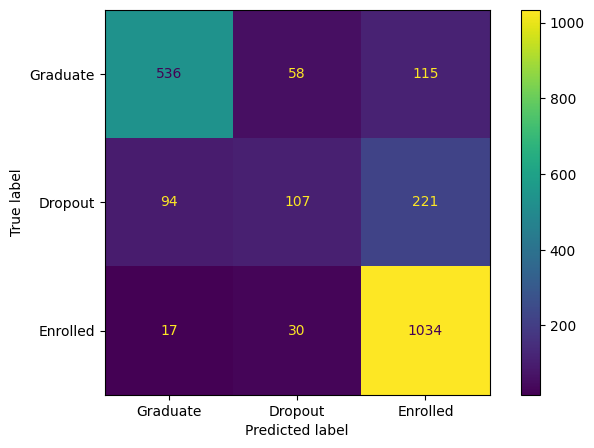

In [30]:
fig, ax = plt.subplots(figsize=(8,5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_encoded, y_pred4),
    display_labels = ['Graduate', 'Dropout', 'Enrolled'],
)

cmp.plot(ax=ax)

In [35]:
print(classification_report(y_test_encoded, y_pred4))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       709
           1       0.55      0.25      0.35       422
           2       0.75      0.96      0.84      1081

    accuracy                           0.76      2212
   macro avg       0.71      0.66      0.66      2212
weighted avg       0.74      0.76      0.73      2212



In [31]:
tuned_parameters = [
    {'kernel': ['linear'], 'C':[1, 10]},
    {'kernel': ['rbf'], 'C':[1,10], "gamma":[1e-3]},
    {'kernel': ['poly'], 'C':[1,10],
     }
]